In [1]:
import keras
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [33]:
from keras.datasets import mnist

In [34]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()

In [35]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


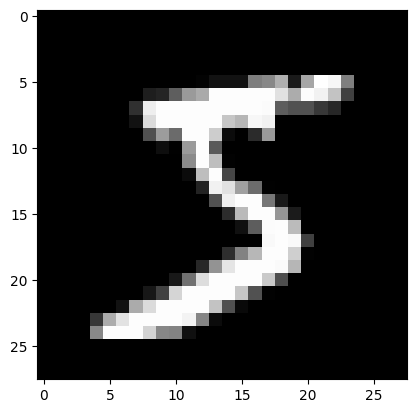

In [36]:
plt.imshow(x_train[0], cmap='gray')

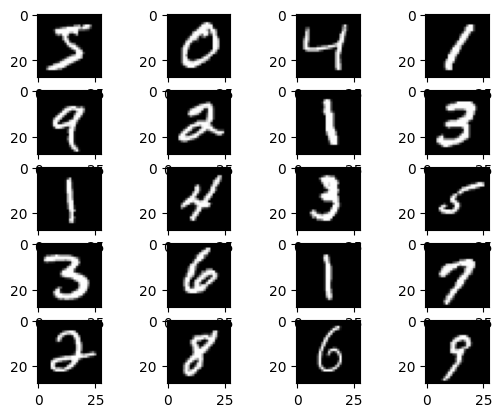

In [37]:
for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.imshow(x_train[i], cmap='gray')

In [38]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [39]:
np.unique(y_train)

array([0., 1.], dtype=float32)

In [40]:
# Normalize Data
x_train = x_train/255
x_test = x_test/255

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [42]:
x_train.shape

(60000, 28, 28)

In [43]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(150, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(130, activation='relu'))
model.add(Dense(160, activation='relu'))
model.add(Dense(130, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 150)               117750    
                                                                 
 dense_19 (Dense)            (None, 120)               18120     
                                                                 
 dense_20 (Dense)            (None, 130)               15730     
                                                                 
 dense_21 (Dense)            (None, 160)               20960     
                                                                 
 dense_22 (Dense)            (None, 130)               20930     
                                                                 
 dense_23 (Dense)            (None, 120)              

In [45]:
# Check Initial Weights
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
# Compile Model 
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 28s 5ms/step - loss: 0.2882 - accuracy: 0.9139
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1344 - accuracy: 0.9624
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1038 - accuracy: 0.9715
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0883 - accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0746 - accuracy: 0.9794
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0629 - accuracy: 0.9826
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0584 - accuracy: 0.9839
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0500 - accuracy: 0.9867
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0480 - accuracy: 0.9864
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [47]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1086 - accuracy: 0.9756


[0.1085614264011383, 0.975600004196167]

In [48]:
prediction = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [49]:
prediction[0]

array([2.79311968e-18, 2.26348287e-10, 7.06189240e-09, 3.62588513e-13,
       1.11284733e-08, 3.19168074e-18, 1.01373126e-22, 1.00000000e+00,
       2.60886614e-15, 4.74063526e-08], dtype=float32)

In [50]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [51]:
np.argmax(prediction[0])

7

In [52]:
np.amax(prediction[0])

1.0

In [53]:
model.save('digit_model.h5')